# NACA 익형이란?

익형은 비행기의 날개를 수직으로 자른 단면을 의미합니다. 익형의 형태는 항공기의 효율에 큰 영향을 미치기 때문에 이를 분석하는 것은 항공역학의 주된 주제 중 하나입니다.  NACA 에어포일은 미국 국립항공자문위원회(미국 항공우주국의 전신)에서 개발된 항공기 날개 익형입니다. 이 문제에서 다루는 것은 `NACAxxxx`형태의 이름을 가지는 4자리 NACA 익형으로, 네 자리의 숫자를 통해 에어포일의 형태를 해석적으로 생성할 수 있습니다.

![NACA2412 에어포일의 형태(출처: 위키미디어 커먼스)](https://upload.wikimedia.org/wikipedia/commons/d/d3/NACA_2412.png)


이 문제에서는 `NACA00xx` 형태의 대칭 익형에 대해서만 다룹니다. 코드 마지막의 두 자리는 익형의 최대 두께(maximum thickness)의 시위(chord) 길이에 대한 비율을 나타냅니다.

![](https://upload.wikimedia.org/wikipedia/commons/8/84/Airfoil_geometry.svg)
에어포일의 수치(출처: 위키미디어 커먼스)

위의 그림은 NACA 에어포일을 결정하는 수치들을 나타낸 것으로, 각각의 수치는 다음과 같습니다. 

1. zero lift line
2. leading edge
3. nose circle
4. thickness
5. camber
6. upper surface
7. trailing edge
8. main camber line
9. lower surface.

대칭 NACA 익형은 다음의 수식을 통해 정의됩니다:

$$
y_t = 5t \left[ 0.2969 \sqrt{x} - 0.1260 x - 0.3516 x^2 + 0.2843 x^3 - 0.1015 x^4 \right]
$$

이때 
- $x$는 두께를 구하려고 하는 지점의 상대적인 위치(0~1)
- $y_t$는 주어진 $x$값에서의 두께의 절반
- $t$는 최대 두께의 시위 길이에 대한 비율(즉 익형 코드 끝 두 자리를 100으로 나눈 값)

이 됩니다.

그런데 이 식만으로는 의미있는 작업을 수행할 수 없습니다. 컴퓨터는 연속적인 수치를 처리할 수 없기 때문에, 연속적인 형태를 충분히 잘 표현할 수 있는 유한한 갯수의 점(샘플 포인트)들을 대신 사용하여야 합니다. 이 문제에서는 익형을 그려내기 위해 샘플 포인트들의 경로(path) $(x_1, y_1) - (x_2, y_2) - \cdots - (x_n, y_n)$을 계산한 뒤 두 배열 `x_coord = [x_1, x_2, ..., x_n]`과 `y_coord = [y_1, y_2, ... y_2]`를 반환해야 합니다.

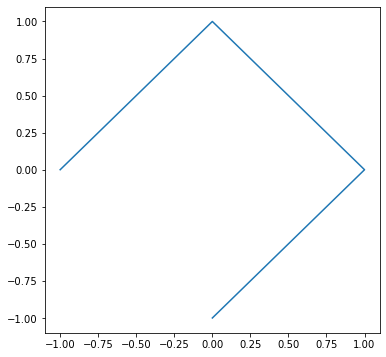

In [18]:
# 반환값의 예시

x_coord = [-1, 0, 1, 0]
y_coord = [0, 1, 0, -1]

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.plot(x_coord, y_coord)
plt.draw()

# 문제와 힌트

다음과 같이 동작하는 함수 `naca_symmetrical_generator`을 작성하시오:

- 입력: 네 자리의 자연수를 표현하는 문자열 `00xx`
- 출력: `NACA00xx` 익형을 표현하는 샘플 포인트들의 x좌표를 담은 ndarray `x_coord`, y좌표를 담은 ndarray `y_coord`.

작성이 완료되면 셀을 실행한 뒤, 아래에 있는 모범답안과 동일하게 표시되는지를 확인하시오.

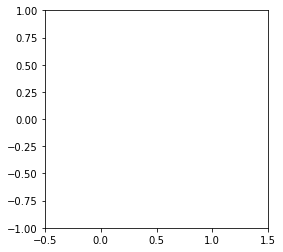

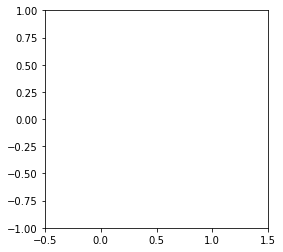

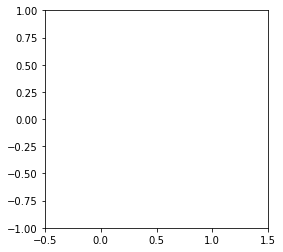

In [19]:
# 필요한 패키지들을 임포트하세요
import matplotlib.pyplot as plt


# 여기에 코드를 작성하세요
def naca_symmetrical_generator(naca_code):
    return [], []


# 그래프를 그리는 코드 - 수정하지 마세요
def main():
    codes = ["0009", "0015", "0021"]

    for naca_code in codes:
        x_coord, y_coord = naca_symmetrical_generator(naca_code)
        
        plt.figure(figsize=(4, 4))
        plt.plot(x_coord, y_coord)

        ax = plt.gca()
        ax.set_xlim([-0.5, 1.5])
        ax.set_ylim([-1, 1])
        
        plt.show()

main()


## 힌트


1. NACA 익형의 정보에 대해 우리가 알고 있는 것은 $x$값과 $y$값 사이의 함수뿐입니다. 이를 이용하려면 먼저 $x$값들의 리스트를 만들어 놓고, 이에 대한 $y$값을 계산하는 것이 옳아 보입니다. Python만을 사용해 이 작업을 수행하려면 여러 개의 반복문이 필요하겠지만, NumPy를 이용하면 이러한 작업을 간단하게 수행할 수 있습니다. `np.linspace`를 통해 샘플 포인트의 $x$좌표를 결정해놓고, 샘플 포인트의 $y$좌표를 계산하면 됩니다.

2. 샘플 포인트가 계산되었다고 하더라도, 이를 그래프를 그릴 수 있는 형식으로 변환해주어야 합니다. `np.hstack`으로 원래의 $x$좌표 배열에 자신을 뒤집은 배열을 붙이고, 윗면을 표현하는 $y$좌표의 배열에 아랫면을 표현하는 $y$좌표의 배열을 뒤집어 붙이는 것이 한 가지 방법입니다.

## 모범 답안

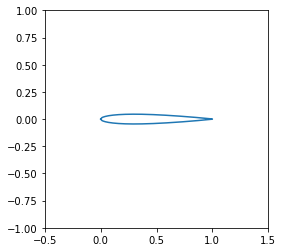

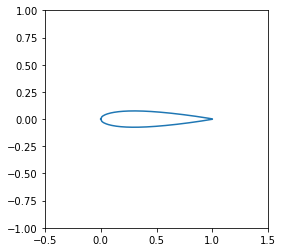

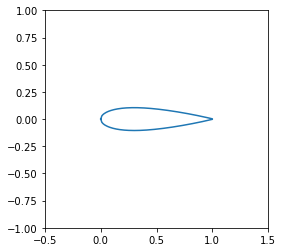

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def naca_symmetrical_generator(naca_code):
    t = int(naca_code[2:4]) / 100

    x = np.linspace(0, 1, 101)
    y = 5 * t * (
        0.2969 * x ** 0.5
        - 0.1260 * x
        - 0.3516 * x ** 2
        + 0.2843 * x ** 3
        - 0.1015 * x ** 4
    )

    x_coord = np.hstack((x, x[::-1]))
    y_coord = np.hstack((y, (-y)[::-1]))

    return x_coord, y_coord


def main():
    codes = ["0009", "0015", "0021"]

    for naca_code in codes:
        x_coord, y_coord = naca_symmetrical_generator(naca_code)
        
        plt.figure(figsize=(4, 4))
        plt.plot(x_coord, y_coord)

        ax = plt.gca()
        ax.set_xlim([-0.5, 1.5])
        ax.set_ylim([-1, 1])
        
        plt.show()

main()
